## Transformations

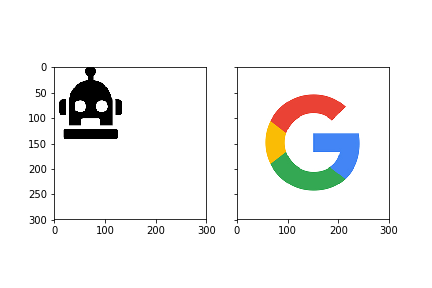

In [457]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [1000,300]
%matplotlib inline

image = cv2.imread("robo.png")
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
ggl = cv2.imread("google.jpg")
ggl_rgb = cv2.cvtColor(ggl, cv2.COLOR_BGR2RGB)

fig, ax = plt.subplots(nrows=1, ncols=2, sharex= True, sharey = True)
ax[0].imshow(image_rgb)
ax[1].imshow(ggl_rgb)
plt.show()

1. Scaling

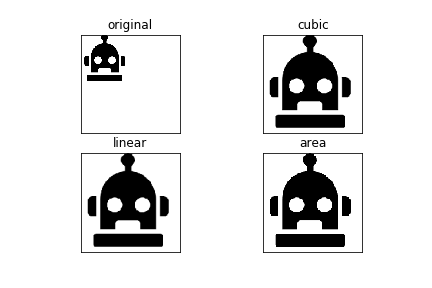

In [476]:
#doubling the size of image using different interpolation methods

big1 = cv2.resize(image, None, fx = 2, fy = 2, interpolation = cv2.INTER_CUBIC)
big2 = cv2.resize(image, None, fx = 2, fy = 2, interpolation = cv2.INTER_LINEAR)
big3 = cv2.resize(image, None, fx = 2, fy = 2, interpolation = cv2.INTER_AREA)

big1 = cv2.cvtColor(big1, cv2.COLOR_BGR2RGB)
big2 = cv2.cvtColor(big2, cv2.COLOR_BGR2RGB)
big3 = cv2.cvtColor(big3, cv2.COLOR_BGR2RGB)

fig, ax = plt.subplots(nrows = 2, ncols = 2, sharex = True, sharey = True)

ax[0,0].imshow(image)
ax[0,0].set_title("original")
ax[0,1].imshow(big1)
ax[0,1].set_title("cubic")
ax[1,0].imshow(big2)
ax[1,0].set_title("linear")
ax[1,1].imshow(big3)
ax[1,1].set_title("area")

plt.xticks([]), plt.yticks([])
plt.show()

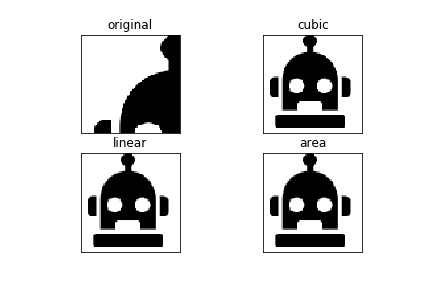

In [475]:
#halving the size of image using different interpolation methods

small1 = cv2.resize(image, None, fx = 0.5, fy = 0.5, interpolation = cv2.INTER_CUBIC)
small2 = cv2.resize(image, None, fx = 0.5, fy = 0.5, interpolation = cv2.INTER_LINEAR)
small3 = cv2.resize(image, None, fx = 0.5, fy = 0.5, interpolation = cv2.INTER_AREA)

small1 = cv2.cvtColor(small1, cv2.COLOR_BGR2RGB)
small2 = cv2.cvtColor(small2, cv2.COLOR_BGR2RGB)
small3 = cv2.cvtColor(small3, cv2.COLOR_BGR2RGB)

fig, ax = plt.subplots(nrows = 2, ncols = 2, sharex = True, sharey = True)

ax[0,0].imshow(image)
ax[0,0].set_title("original")
ax[0,1].imshow(small1)
ax[0,1].set_title("cubic")
ax[1,0].imshow(small2)
ax[1,0].set_title("linear")
ax[1,1].imshow(small3)
ax[1,1].set_title("area")
plt.xticks([]), plt.yticks([])
plt.show()

#plt.subplot(141), plt.imshow(image), plt.title('Original')
#plt.xticks([]), plt.yticks([])
#plt.subplot(142), plt.imshow(small1), plt.title("Cubic")
#plt.xticks([]), plt.yticks([])
#plt.subplot(143), plt.imshow(small2), plt.title('Linear')
#plt.xticks([]), plt.yticks([])
#plt.subplot(144), plt.imshow(small3), plt.title("Area")
#plt.xticks([]), plt.yticks([])
#
#plt.show()

2. Translation

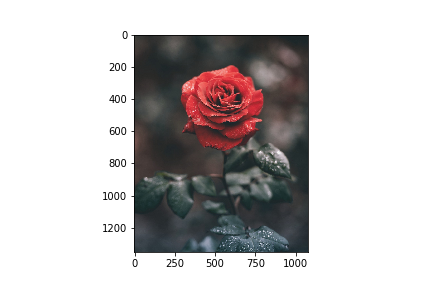

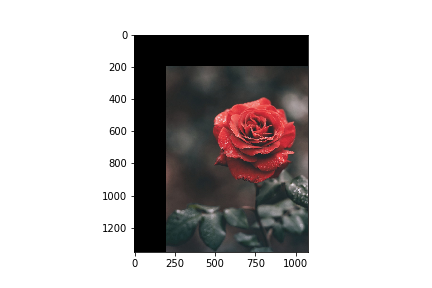

In [528]:
rose = cv2.imread("rose.jpg")
rows, cols, channels = rose.shape

M = np.float32([[1, 0, 200], [0, 1, 200]])   #translation matrix
shifted = cv2.warpAffine(rose, M, (cols, rows))

rose = cv2.cvtColor(rose, cv2.COLOR_BGR2RGB)
shifted = cv2.cvtColor(shifted, cv2.COLOR_BGR2RGB)

plt.imshow(rose)
plt.show()
plt.imshow(shifted)
plt.show()

3. Rotation

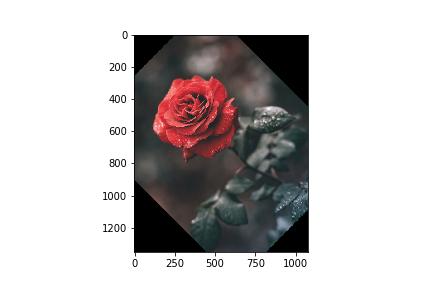

In [477]:
M_rotate = cv2.getRotationMatrix2D(((cols-1)/2.0, (rows-1)/2.0), 45, 1)
rotated_rose = cv2.warpAffine(rose, M_rotate, (cols, rows))
plt.imshow(rotated_rose)
plt.show()

4. Perspective transformation

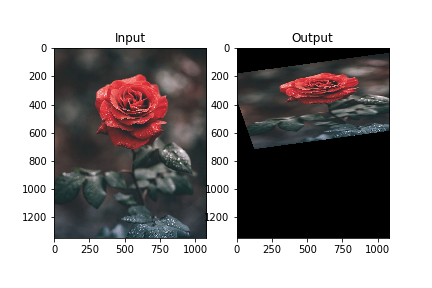

In [478]:
pts1 = np.float32([[100,50],[500,200],[50,800]])
pts2 = np.float32([[50,200],[500,200],[100,500]])

M_warp = cv2.getAffineTransform(pts1,pts2)
warp = cv2.warpAffine(rose,M_warp,(cols,rows))
plt.subplot(121),plt.imshow(rose),plt.title('Input')
plt.subplot(122),plt.imshow(warp),plt.title('Output')
plt.show()

## Masking

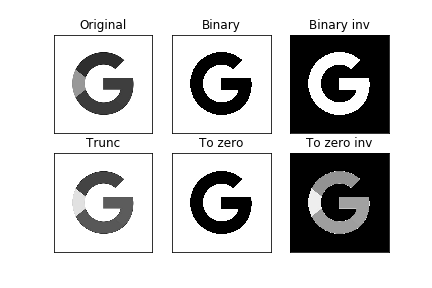

In [96]:
ggl_gray = cv2.cvtColor(ggl, cv2.COLOR_BGR2GRAY)
ret, thresh1 = cv2.threshold(ggl_gray, 200, 255, cv2.THRESH_BINARY)
ret, thresh2 = cv2.threshold(ggl_gray, 200, 255, cv2.THRESH_BINARY_INV)
ret, thresh3 = cv2.threshold(ggl_gray, 200, 255, cv2.THRESH_TRUNC)
ret, thresh4 = cv2.threshold(ggl_gray, 200, 255, cv2.THRESH_TOZERO)
ret, thresh5 = cv2.threshold(ggl_gray, 200, 255, cv2.THRESH_TOZERO_INV)

titles = ['Original', 'Binary', 'Binary inv', 'Trunc', 'To zero', 'To zero inv']
images = [ggl_gray, thresh1, thresh2, thresh3, thresh4, thresh5]

for i in range(6):
    plt.subplot(2,3,i+1), plt.imshow(images[i], cmap = 'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])

plt.show()

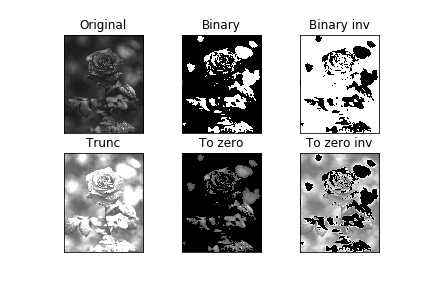

In [100]:
rose_gray = cv2.cvtColor(rose, cv2.COLOR_BGR2GRAY)
ret, rose1 = cv2.threshold(rose_gray, 80, 255, cv2.THRESH_BINARY)
ret, rose2 = cv2.threshold(rose_gray, 80, 255, cv2.THRESH_BINARY_INV)
ret, rose3 = cv2.threshold(rose_gray, 80, 255, cv2.THRESH_TRUNC)
ret, rose4 = cv2.threshold(rose_gray, 80, 255, cv2.THRESH_TOZERO)
ret, rose5 = cv2.threshold(rose_gray, 80, 255, cv2.THRESH_TOZERO_INV)

titles = ['Original', 'Binary', 'Binary inv', 'Trunc', 'To zero', 'To zero inv']
images = [rose_gray, rose1, rose2, rose3, rose4, rose5]

for i in range(6):
    plt.subplot(2,3,i+1), plt.imshow(images[i], cmap = 'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])

plt.show()

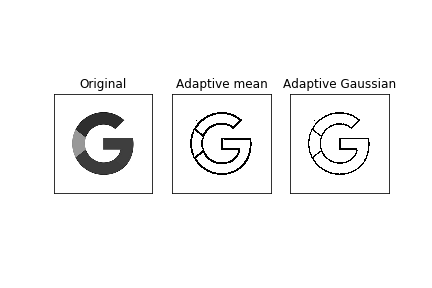

In [103]:
#Adaptive thresholding

th6 = cv2.adaptiveThreshold(ggl_gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)
th7 = cv2.adaptiveThreshold(ggl_gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

titles1 = ['Original', 'Adaptive mean', 'Adaptive Gaussian']
images1 = [ggl_gray, th6, th7]

for i in range(3):
    plt.subplot(1,3,i+1), plt.imshow(images1[i], 'gray')
    plt.title(titles1[i])
    plt.xticks([]), plt.yticks([])
plt.show()

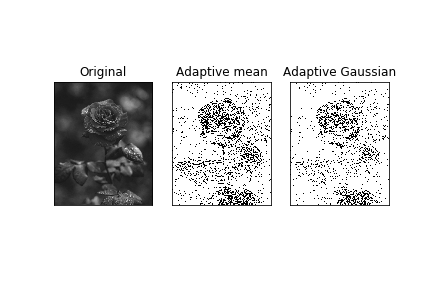

In [104]:
rose5 = cv2.adaptiveThreshold(rose_gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)
rose6 = cv2.adaptiveThreshold(rose_gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

titles1 = ['Original', 'Adaptive mean', 'Adaptive Gaussian']
images1 = [rose_gray, rose5, rose6]

for i in range(3):
    plt.subplot(1,3,i+1), plt.imshow(images1[i], 'gray')
    plt.title(titles1[i])
    plt.xticks([]), plt.yticks([])
plt.show()

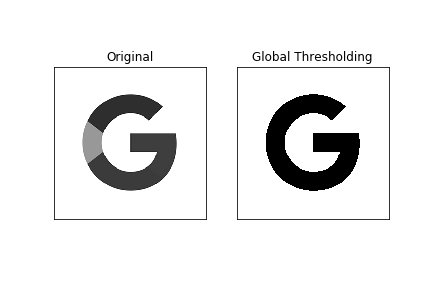

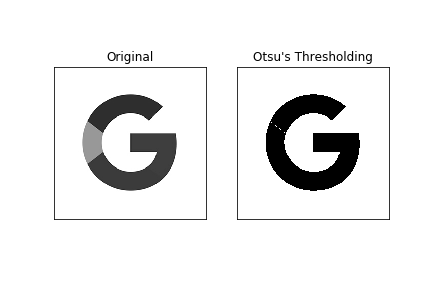

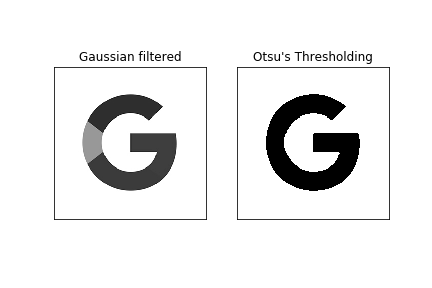

In [519]:
#Otsu's binarisation

ret, ggl_otsu1 = cv2.threshold(ggl_gray, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

ggl_blur = cv2.GaussianBlur(ggl_gray, (5,5), 0)
ret, ggl_otsu2 = cv2.threshold(ggl_blur, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

images2 = [ggl_gray, thresh1,
          ggl_gray, ggl_otsu1,
          ggl_gray, ggl_otsu2]
titles2 = ['Original', 'Global Thresholding',
          'Original', "Otsu's Thresholding",
          "Gaussian filtered", "Otsu's Thresholding"]

for i in range(3):
    plt.subplot(1,2,1), plt.imshow(images2[i*2],'gray')
    plt.title(titles2[i*2]), plt.xticks([]), plt.yticks([])
    plt.subplot(1,2,2),plt.imshow(images2[i*2+1],'gray')
    plt.title(titles2[i*2+1]), plt.xticks([]), plt.yticks([])
    plt.show()

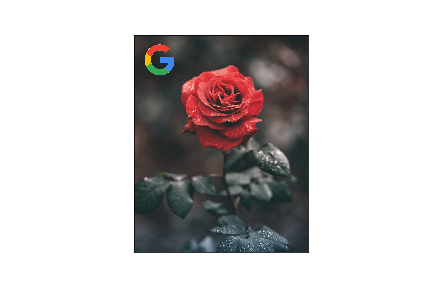

In [534]:
#creating mask out of google logo and imposing on rose image

mask_inv = ggl_otsu2
mask = cv2.bitwise_not(mask_inv)
new_rose = rose.copy()

rows, cols = mask.shape
roi = new_rose[10:rows+10, 10:cols+10]

rose_bg = cv2.bitwise_and(roi,roi,mask = mask_inv)
logo = cv2.bitwise_and(ggl_rgb,ggl_rgb,mask = mask)

dst = cv2.add(rose_bg, logo)
new_rose[10:rows+10, 10:cols+10] = dst

plt.imshow(new_rose)
plt.xticks([]), plt.yticks([])
plt.show()

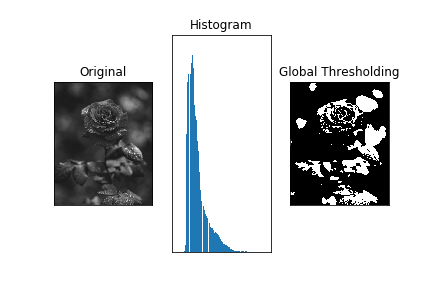

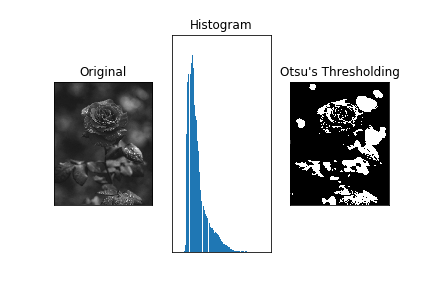

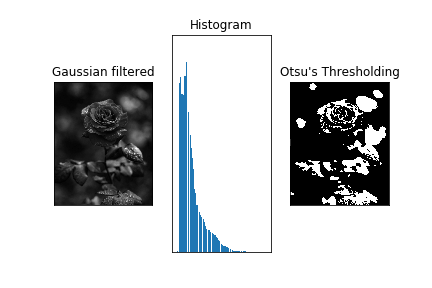

In [481]:
#Otsu's binarisation

ret, rose_otsu1 = cv2.threshold(rose_gray, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

rose_blur = cv2.GaussianBlur(rose_gray, (5,5), 0)
ret, rose_otsu2 = cv2.threshold(rose_blur, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

images3 = [rose_gray, 0, rose1,
          rose_gray, 0, rose_otsu1,
          rose_blur, 0, rose_otsu2]
titles3 = ['Original', 'Histogram', 'Global Thresholding',
          'Original', 'Histogram', "Otsu's Thresholding",
          "Gaussian filtered", "Histogram", "Otsu's Thresholding"]

for i in range(3):
    plt.subplot(1,3,1), plt.imshow(images3[i*3],'gray')
    plt.title(titles3[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(1,3,2), plt.hist(images3[i*3].ravel(), 256)
    plt.title(titles3[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(1,3,3),plt.imshow(images3[i*3+2],'gray')
    plt.title(titles3[i*3+2]), plt.xticks([]), plt.yticks([])
    plt.show()

#for i in range(3):
#    plt.imshow(images3[i*3 + 2], 'gray')
#    plt.xticks([]), plt.yticks([])
#    plt.show()

## Smoothening and sharpening

1. Smoothening

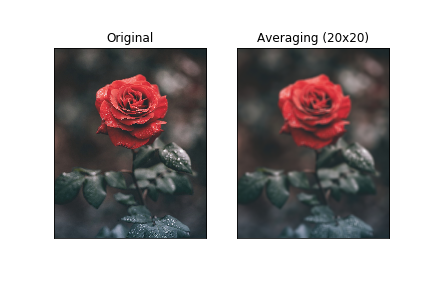

In [482]:
kernel = np.ones((20,20), np.float32)/400  #normalised
rose_avg = cv2.filter2D(rose, -1, kernel)  #destination image depth = -1 means depth is same as that of source
#above is same as using cv2.blur(rose, (20,20))

plt.subplot(121), plt.imshow(rose), plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(rose_avg), plt.title("Averaging (20x20)")
plt.xticks([]), plt.yticks([])
plt.show()

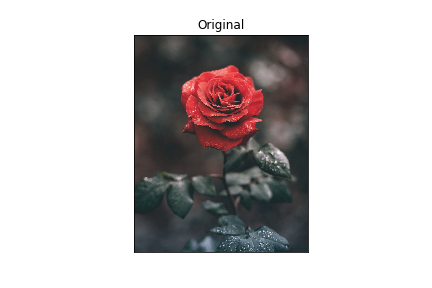

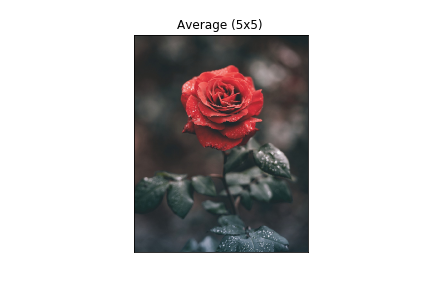

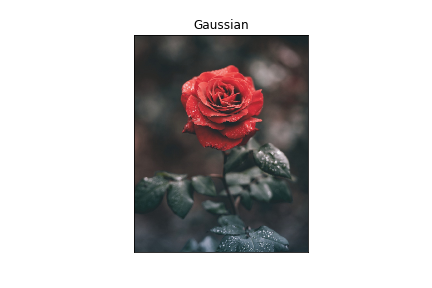

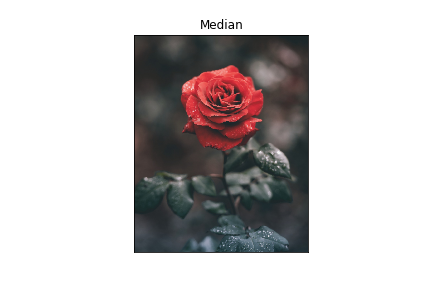

In [147]:
rose_avg5 = cv2.blur(rose, (5,5))
rose_gauss = cv2.GaussianBlur(rose, (5,5), 0)
rose_median = cv2.medianBlur(rose, 5)
roses = [rose, rose_avg5, rose_gauss, rose_median]
titles6 = ["Original", "Average (5x5) ", "Gaussian", "Median"]

for i in range(4):
    plt.imshow(roses[i])
    plt.title(titles6[i])
    plt.xticks([]), plt.yticks([])
    plt.show()

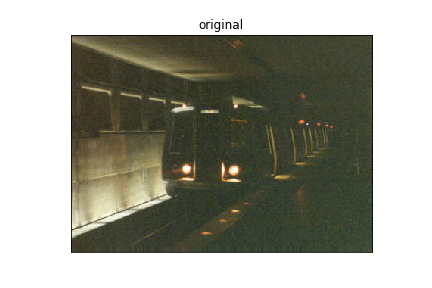

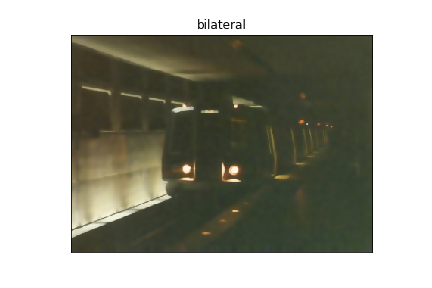

In [153]:
train = cv2.imread("train.jpg")
train = cv2.cvtColor(train, cv2.COLOR_BGR2RGB)

train_bl = cv2.bilateralFilter(train,9,75,75)
plt.imshow(train)
plt.title("original")
plt.xticks([]), plt.yticks([])
plt.show()
plt.imshow(train_bl)
plt.title("bilateral")
plt.xticks([]), plt.yticks([])
plt.show()

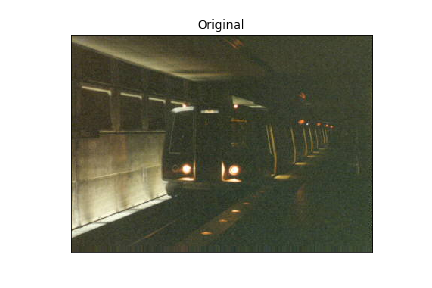

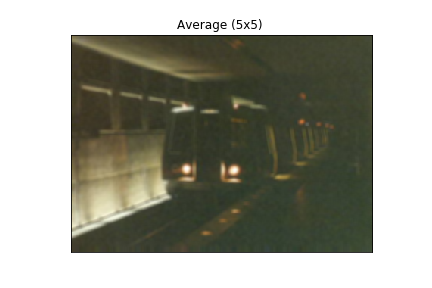

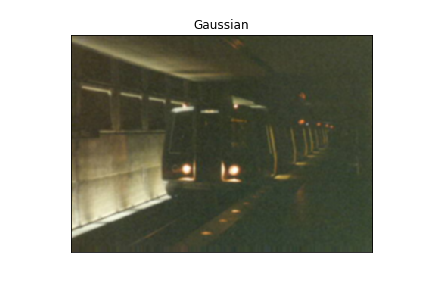

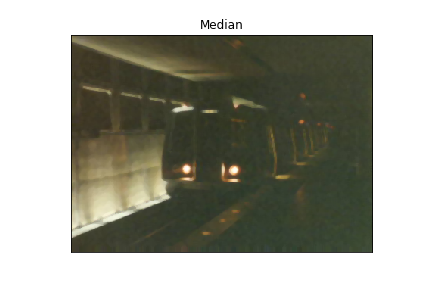

In [154]:
train_avg5 = cv2.blur(train, (5,5))
train_gauss = cv2.GaussianBlur(train, (5,5), 0)
train_median = cv2.medianBlur(train, 5)
trains = [train, train_avg5, train_gauss, train_median]
titles7 = ["Original", "Average (5x5) ", "Gaussian", "Median"]

for i in range(4):
    plt.imshow(trains[i])
    plt.title(titles7[i])
    plt.xticks([]), plt.yticks([])
    plt.show()

2.Sharpening

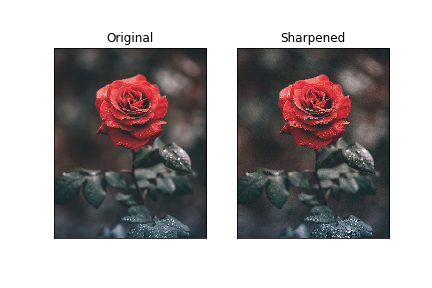

In [506]:
#sharpening by convolution with sharpening kernel

kernel_sharp = np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])
sharp_rose1 = cv2.filter2D(rose, -1, kernel_sharp)  #destination image depth = -1 means depth is same as that of source

plt.subplot(121), plt.imshow(rose), plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(sharp_rose1), plt.title("Sharpened")
plt.xticks([]), plt.yticks([])
plt.show()

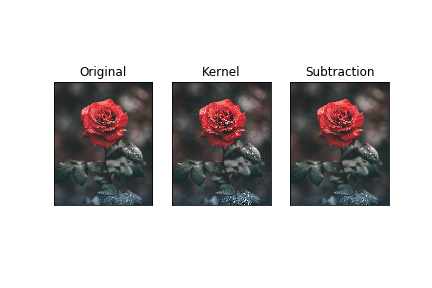

In [484]:
#sharpening by weighted subtraction of Gaussian blurred rose from original

sharp_rose2 = cv2.addWeighted(rose, 1.5, rose_gauss, -0.5, 0)

plt.subplot(131), plt.imshow(rose), plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(sharp_rose1), plt.title("Kernel")
plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(sharp_rose2), plt.title("Subtraction")
plt.xticks([]), plt.yticks([])
plt.show()

(As per the results above, kernel sharpening is more effective than weighted subtraction of the Gaussian blurred image from the original image.)

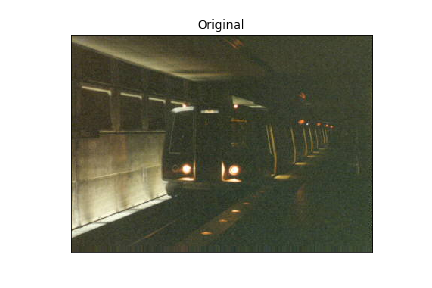

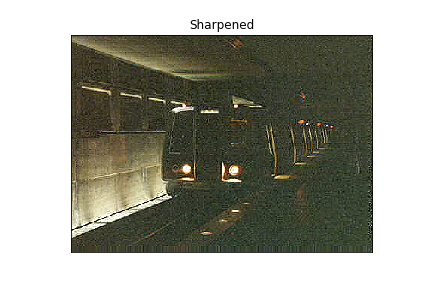

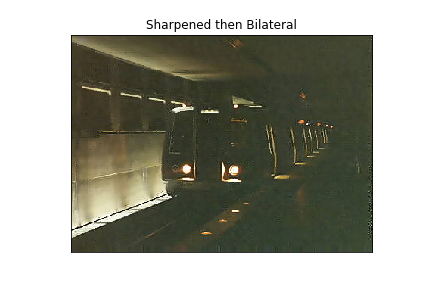

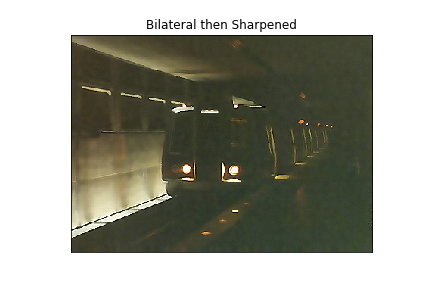

In [511]:
sharp_train = cv2.filter2D(train, -1, kernel_sharp)  #destination image depth = -1 means depth is same as that of source
train2 = cv2.bilateralFilter(sharp_train, 9, 75, 75)
train3 = cv2.filter2D(train_bl, -1, kernel_sharp)

plt.imshow(train), plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.show()
plt.imshow(sharp_train), plt.title("Sharpened")
plt.xticks([]), plt.yticks([])
plt.show()
plt.imshow(train2), plt.title("Sharpened then Bilateral")
plt.xticks([]), plt.yticks([])
plt.show()
plt.imshow(train3), plt.title("Bilateral then Sharpened")
plt.xticks([]), plt.yticks([])
plt.show()

(By comparing the different train images, it can be concluded that the clarity of an image can be improved by first sharpening it using the kernel and then denoising it using bilateral filter.)

## Edge Detection

1. Detecting edges of rose by convolution with suitable kernel

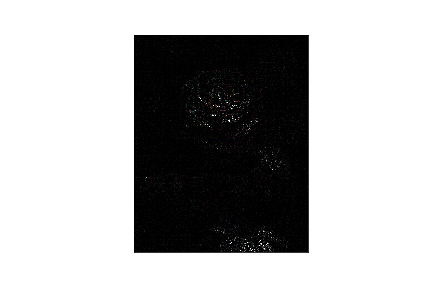

In [175]:
kernel_edge = np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])
edge_rose1 = cv2.filter2D(rose, -1, kernel_edge)  

plt.imshow(edge_rose1)
plt.xticks([]), plt.yticks([])
plt.show()

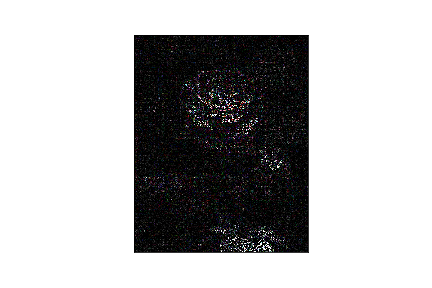

In [176]:
edge_rose2 = cv2.filter2D(sharp_rose1, -1, kernel_edge)  

plt.imshow(edge_rose2)
plt.xticks([]), plt.yticks([])
plt.show()

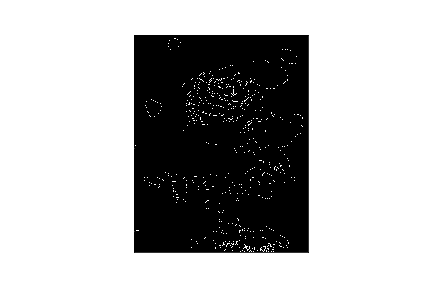

In [488]:
edge_rose3 = cv2.filter2D(rose_otsu2, -1, kernel_edge)  

plt.imshow(edge_rose3, 'gray')
plt.xticks([]), plt.yticks([])
plt.show()

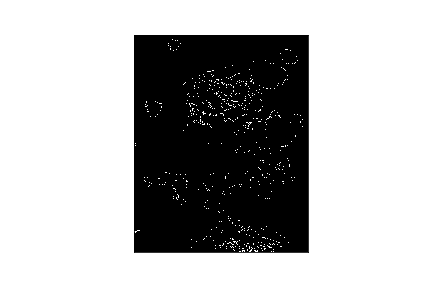

In [504]:
#using Canny edge detection for rose_otsu1

edge_rose4 = cv2.Canny(rose_otsu1, 50, 200)

plt.imshow(edge_rose4, 'gray')
plt.xticks([]), plt.yticks([])
plt.show()

2. Comparison of different edge detection techniques applied on the train picture

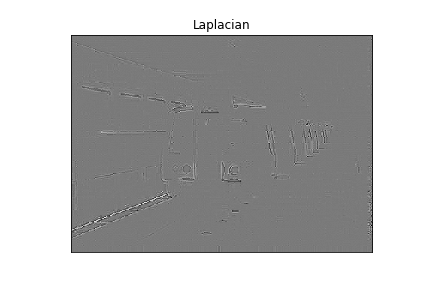

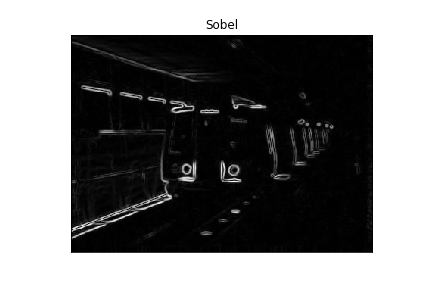

In [517]:
gray_train = cv2.cvtColor(train2, cv2.COLOR_RGB2GRAY)
laplacian_train = cv2.Laplacian(gray_train, cv2.CV_64F)
sobelx = cv2.Sobel(gray_train, cv2.CV_64F, 1, 0, ksize = 5)
sobely = cv2.Sobel(gray_train, cv2.CV_64F, 0, 1, ksize = 5)
sobel = np.sqrt(pow(sobelx, 2.0) + pow(sobely, 2.0))

plt.imshow(laplacian_train,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.show()
plt.imshow(sobel,cmap = 'gray')
plt.title('Sobel'), plt.xticks([]), plt.yticks([])
plt.show()

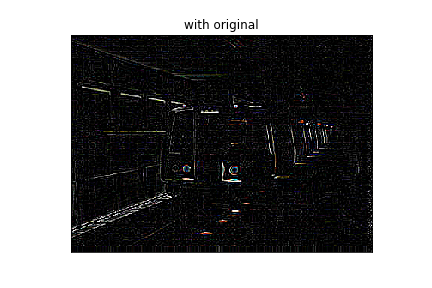

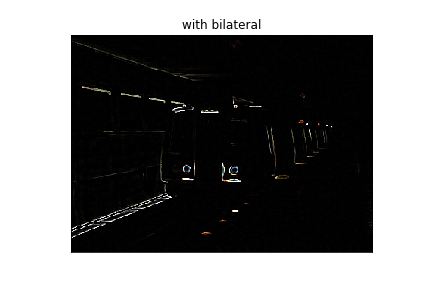

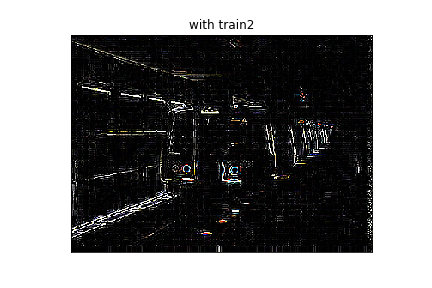

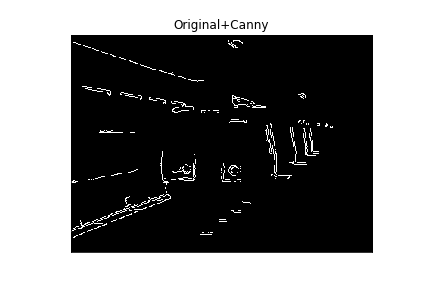

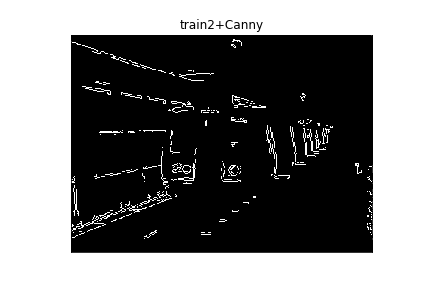

In [537]:
edge_train1 = cv2.filter2D(train, -1, kernel_edge)
edge_train2 = cv2.filter2D(train_bl, -1, kernel_edge)

e1 = cv2.getTickCount()
edge_train3 = cv2.filter2D(train2, -1, kernel_edge)
e2 = cv2.getTickCount()

edge_train4 = cv2.Canny(train, 90, 250)

e3 = cv2.getTickCount()
edge_train5 = cv2.Canny(train2, 90, 250)
e4 = cv2.getTickCount()

plt.imshow(edge_train1), plt.title('with original')
plt.xticks([]), plt.yticks([])
plt.show()
plt.imshow(edge_train2), plt.title("with bilateral")
plt.xticks([]), plt.yticks([])
plt.show()
plt.imshow(edge_train3), plt.title("with train2")
plt.xticks([]), plt.yticks([])
plt.show()
plt.imshow(edge_train4,  'gray'), plt.title("Original+Canny")
plt.xticks([]), plt.yticks([])
plt.show()
plt.imshow(edge_train5, 'gray'), plt.title("train2+Canny")
plt.xticks([]), plt.yticks([])
plt.show()

Both train2 + Convolution with edge kernel and train2 + Canny have given decent edge detection results. The former, however, has a few false edges.

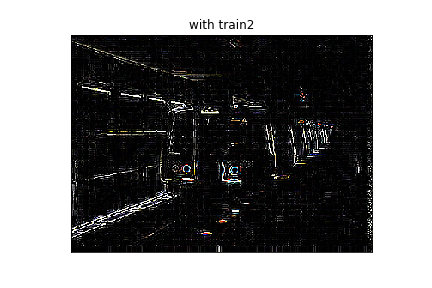

Time taken = 
0.0008793047556195968


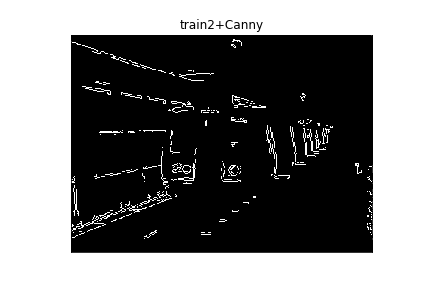

Time taken = 
0.003620639360296515


In [538]:
plt.imshow(edge_train3), plt.title("with train2")
plt.xticks([]), plt.yticks([])
plt.show()
print('Time taken = ')
print((e2-e1)/cv2.getTickFrequency())
plt.imshow(edge_train5, 'gray'), plt.title("train2+Canny")
plt.xticks([]), plt.yticks([])
plt.show()
print('Time taken = ')
print((e4-e3)/cv2.getTickFrequency())

From above, Canny edge detection turned out to be 4 times slower.

## Morphological Transformations

1. Erosion

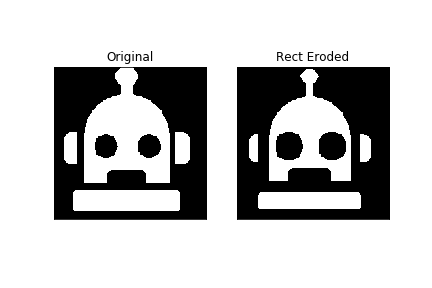

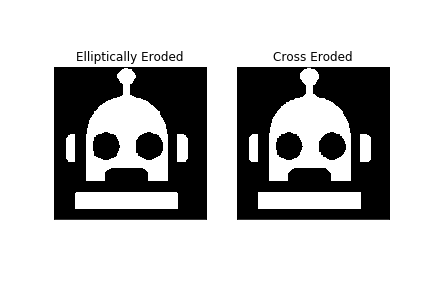

In [235]:
ret, robo = cv2.threshold(image_rgb, 150, 255, cv2.THRESH_BINARY_INV)
rect_kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(5,5))
ellipse_kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5))
cross_kernel = cv2.getStructuringElement(cv2.MORPH_CROSS,(5,5))

erosion1 = cv2.erode(robo, rect_kernel,iterations = 1)
erosion2 = cv2.erode(robo, ellipse_kernel,iterations = 1)
erosion3 = cv2.erode(robo, cross_kernel,iterations = 1)

plt.subplot(121), plt.imshow(robo)
plt.title("Original")
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(erosion1)
plt.title("Rect Eroded")
plt.xticks([]), plt.yticks([])
plt.show()
plt.subplot(121), plt.imshow(erosion2)
plt.title("Elliptically Eroded")
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(erosion3)
plt.title("Cross Eroded")
plt.xticks([]), plt.yticks([])
plt.show()

2. Dilation

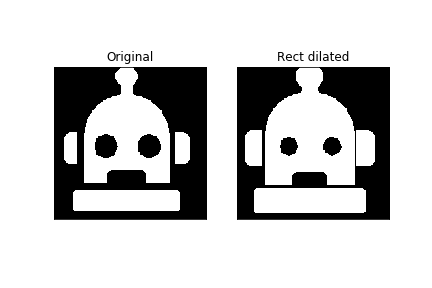

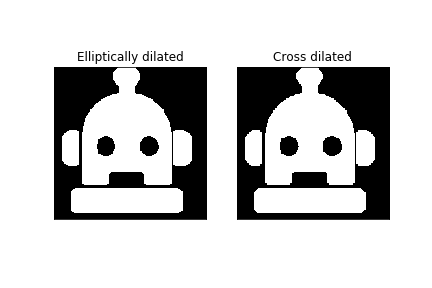

In [236]:
dilation1 = cv2.dilate(robo, rect_kernel,iterations = 1)
dilation2 = cv2.dilate(robo, ellipse_kernel,iterations = 1)
dilation3 = cv2.dilate(robo, cross_kernel,iterations = 1)

plt.subplot(121), plt.imshow(robo)
plt.title("Original")
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(dilation1)
plt.title("Rect dilated")
plt.xticks([]), plt.yticks([])
plt.show()
plt.subplot(121), plt.imshow(dilation2)
plt.title("Elliptically dilated")
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(dilation3)
plt.title("Cross dilated")
plt.xticks([]), plt.yticks([])
plt.show()

3. Opening

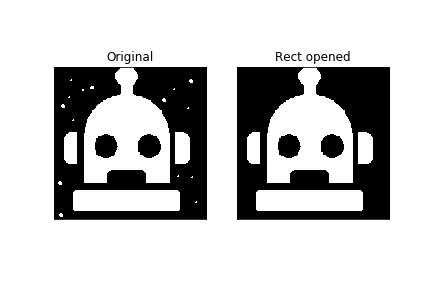

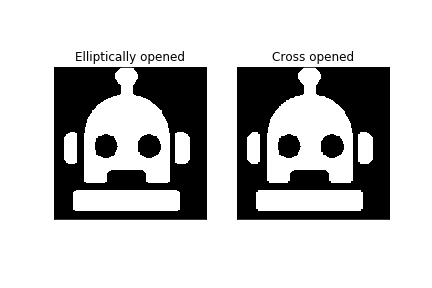

In [240]:
robo1 = cv2.imread('robo_noisybg.png')
ret, robo1 = cv2.threshold(robo1, 150, 255, cv2.THRESH_BINARY_INV)

opening1 = cv2.morphologyEx(robo1, cv2.MORPH_OPEN, rect_kernel)
opening2 = cv2.morphologyEx(robo1, cv2.MORPH_OPEN, ellipse_kernel)
opening3 = cv2.morphologyEx(robo1, cv2.MORPH_OPEN, cross_kernel)

plt.subplot(121), plt.imshow(robo1)
plt.title("Original")
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(opening1)
plt.title("Rect opened")
plt.xticks([]), plt.yticks([])
plt.show()
plt.subplot(121), plt.imshow(opening2)
plt.title("Elliptically opened")
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(opening3)
plt.title("Cross opened")
plt.xticks([]), plt.yticks([])
plt.show()

4. Closing

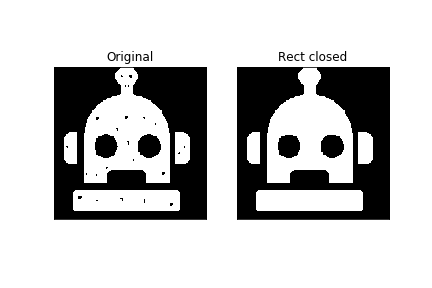

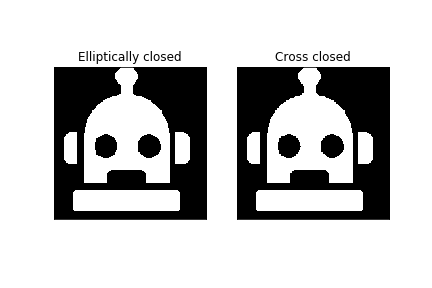

In [241]:
robo2 = cv2.imread('robo_noisyfg.png')
ret, robo2 = cv2.threshold(robo2, 150, 255, cv2.THRESH_BINARY_INV)

closing1 = cv2.morphologyEx(robo2, cv2.MORPH_CLOSE, rect_kernel)
closing2 = cv2.morphologyEx(robo2, cv2.MORPH_CLOSE, ellipse_kernel)
closing3 = cv2.morphologyEx(robo2, cv2.MORPH_CLOSE, cross_kernel)

plt.subplot(121), plt.imshow(robo2)
plt.title("Original")
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(closing1)
plt.title("Rect closed")
plt.xticks([]), plt.yticks([])
plt.show()
plt.subplot(121), plt.imshow(closing2)
plt.title("Elliptically closed")
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(closing3)
plt.title("Cross closed")
plt.xticks([]), plt.yticks([])
plt.show()

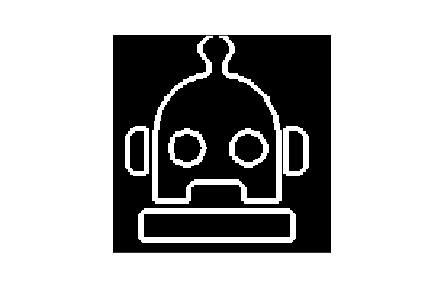

In [247]:
robo_outline = cv2.morphologyEx(robo, cv2.MORPH_GRADIENT, cross_kernel)
plt.imshow(robo_outline)
plt.xticks([]), plt.yticks([])
plt.show()

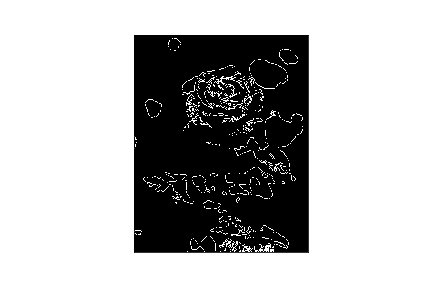

In [489]:
rose_outline = cv2.morphologyEx(rose_otsu2, cv2.MORPH_GRADIENT, cross_kernel)

plt.imshow(rose_outline, 'gray')
plt.xticks([]), plt.yticks([])
plt.show()

The edges in this case are better than those detected by the actual edge detection algorithms.

## Face detection using Haar Cascades

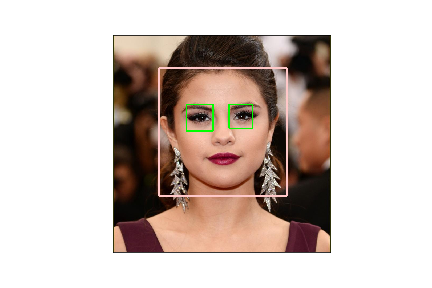

In [413]:
face_cascade = cv2.CascadeClassifier(r'C:\source\opencv\build\etc\haarcascades\haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(r'C:\source\opencv\build\etc\haarcascades\haarcascade_eye.xml')

selena = cv2.imread('selena.jpeg')
gray_selena = cv2.cvtColor(selena, cv2.COLOR_BGR2GRAY)

faces = face_cascade.detectMultiScale(gray_selena, scaleFactor = 1.3, minNeighbors = 6)

for (x,y,w,h) in faces:
    cv2.rectangle(selena, (x,y), (x+w,y+h), (200,200,255), 5)
    roi_gray = gray_selena[y:y+h, x:x+w]
    roi_color = selena[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray, 1.3, 3)
    for (ex,ey,eh,ew) in eyes:
        cv2.rectangle(roi_color, (ex,ey), (ex+ew,ey+eh), (0,255,0), 3)
        
selena = cv2.cvtColor(selena, cv2.COLOR_BGR2RGB)
plt.imshow(selena)
plt.xticks([]), plt.yticks([])
plt.show()

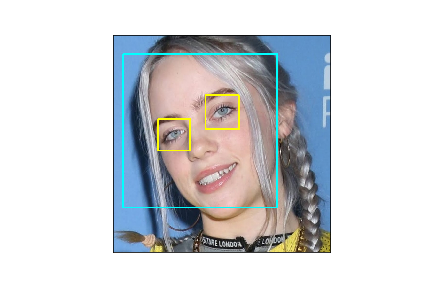

In [407]:
face_cascade = cv2.CascadeClassifier(r'C:\source\opencv\build\etc\haarcascades\haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(r'C:\source\opencv\build\etc\haarcascades\haarcascade_eye.xml')

billie = cv2.imread('billie.jpg')
gray_billie = cv2.cvtColor(billie, cv2.COLOR_BGR2GRAY)

faces = face_cascade.detectMultiScale(gray_billie, scaleFactor = 1.1, minNeighbors = 3)

for (x,y,w,h) in faces:
    cv2.rectangle(billie, (x,y), (x+w,y+h), (255,255,0), 6)
    roi_gray = gray_billie[y:y+h, x:x+w]
    roi_color = billie[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray, 1.1, 5, minSize = (100,100))
    for (ex,ey,eh,ew) in eyes:
        cv2.rectangle(roi_color, (ex,ey), (ex+ew,ey+eh), (0,255,255), 6)
        
billie = cv2.cvtColor(billie, cv2.COLOR_BGR2RGB)
plt.imshow(billie)
plt.xticks([]), plt.yticks([])
plt.show()

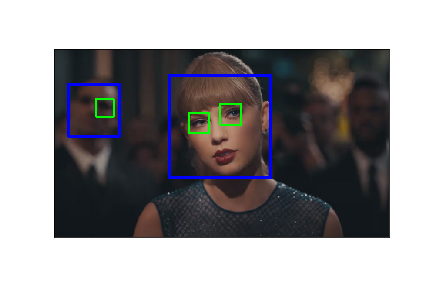

In [400]:
face_cascade = cv2.CascadeClassifier(r'C:\source\opencv\build\etc\haarcascades\haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(r'C:\source\opencv\build\etc\haarcascades\haarcascade_eye.xml')

taylor = cv2.imread('taylor.jpg')
gray_taylor = cv2.cvtColor(taylor, cv2.COLOR_BGR2GRAY)

faces = face_cascade.detectMultiScale(gray_taylor, scaleFactor = 1.1, minNeighbors = 3)

for (x,y,w,h) in faces:
    cv2.rectangle(taylor, (x,y), (x+w,y+h), (255,0,0), 5)
    roi_gray = gray_taylor[y:y+h, x:x+w]
    roi_color = taylor[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray, 1.1, 3)
    for (ex,ey,eh,ew) in eyes:
        cv2.rectangle(roi_color, (ex,ey), (ex+ew,ey+eh), (0,255,0), 3)
        
taylor = cv2.cvtColor(taylor, cv2.COLOR_BGR2RGB)
plt.imshow(taylor)
plt.xticks([]), plt.yticks([])
plt.show()

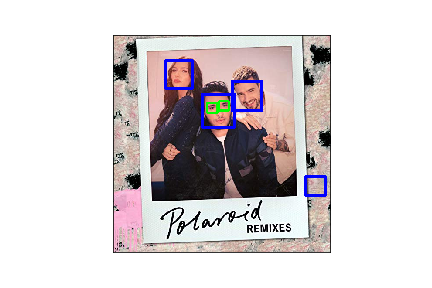

In [451]:
face_cascade = cv2.CascadeClassifier(r'C:\source\opencv\build\etc\haarcascades\haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(r'C:\source\opencv\build\etc\haarcascades\haarcascade_eye.xml')

polaroid = cv2.imread('polaroid.jpg')
gray_polaroid = cv2.cvtColor(polaroid, cv2.COLOR_BGR2GRAY)

faces = face_cascade.detectMultiScale(gray_polaroid, scaleFactor = 1.1, minNeighbors = 3)

for (x,y,w,h) in faces:
    cv2.rectangle(polaroid, (x,y), (x+w,y+h), (255,0,0), 5)
    roi_gray = gray_polaroid[y:y+h, x:x+w]
    roi_color = polaroid[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray, 1.1, 3)
    for (ex,ey,eh,ew) in eyes:
        cv2.rectangle(roi_color, (ex,ey), (ex+ew,ey+eh), (0,255,0), 3)
        
polaroid = cv2.cvtColor(polaroid, cv2.COLOR_BGR2RGB)
plt.imshow(polaroid)
plt.xticks([]), plt.yticks([])
plt.show()

In [452]:
for (x,y,w,h) in faces:   #to find out size of false positive
    print([w,h])

[75, 75]
[63, 63]
[44, 44]
[67, 67]


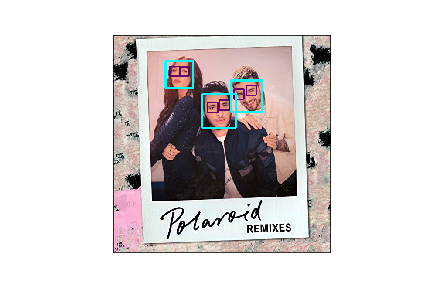

In [456]:
face_cascade = cv2.CascadeClassifier(r'C:\source\opencv\build\etc\haarcascades\haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(r'C:\source\opencv\build\etc\haarcascades\haarcascade_eye.xml')

polaroid = cv2.imread('polaroid.jpg')
gray_polaroid = cv2.cvtColor(polaroid, cv2.COLOR_BGR2GRAY)

faces = face_cascade.detectMultiScale(gray_polaroid, scaleFactor = 1.2, minNeighbors = 3, minSize = (50,50))

for (x,y,w,h) in faces:
    cv2.rectangle(polaroid, (x,y), (x+w,y+h), (255,255,0), 3)
    roi_gray = gray_polaroid[y:y+h, x:x+w]
    roi_color = polaroid[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray, 1.03, 2)
    for (ex,ey,eh,ew) in eyes:
        cv2.rectangle(roi_color, (ex,ey), (ex+ew,ey+eh), (100,0,100), 2)
        
polaroid = cv2.cvtColor(polaroid, cv2.COLOR_BGR2RGB)
plt.imshow(polaroid)
plt.xticks([]), plt.yticks([])
plt.show()